In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import os
from util import RESOURCE_DIR

In [14]:
from util import RESOURCE_DIR, IMAGES_DIR
type_characterization = ['database.xlsx', 'implementation.xlsx', 'implementation_names.xlsx', 'query.xlsx', 'count_implementation_rate.xlsx', 'count_sql.xlsx', 'usage_fan_in_file.xlsx']
CHARACTERIZATION_FILE_PATH = RESOURCE_DIR + os.sep + type_characterization[1]
df = pd.read_excel(CHARACTERIZATION_FILE_PATH, engine = 'openpyxl')
len(df)
df.head()

,Projects,Domains,mybatis,jOOQ,Spring,JPA,JDBC,Hibernate,EclipseLink
0,Activiti,Enterprise Resource Management,1.0,0.0,1.0,1.0,0.0,1.0,0.0
1,lottie-android,Game,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,spring-cloud-alibaba,Software Development,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,nacos,Infrastructure Management,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,fastjson,Data Management,0.0,0.0,1.0,1.0,0.0,1.0,0.0


In [3]:
data_with_index = df.set_index("Projects")
data_with_index = data_with_index.drop(columns='JPA')
data_with_index.head()

,Domains,mybatis,jOOQ,Spring,JDBC,Hibernate,EclipseLink
Projects,,,,,,,
Activiti,Enterprise Resource Management,1.0,0.0,1.0,0.0,1.0,0.0
lottie-android,Game,0.0,0.0,0.0,0.0,0.0,0.0
spring-cloud-alibaba,Software Development,1.0,0.0,0.0,0.0,1.0,0.0
nacos,Infrastructure Management,1.0,0.0,1.0,0.0,0.0,0.0
fastjson,Data Management,0.0,0.0,1.0,0.0,1.0,0.0


In [4]:
data_jpa = df[["Projects", "Domains", "JPA"]].copy()
data_jpa.iloc[: , 2:].sum().sort_values(ascending=False)

JPA    97.0
dtype: float64

In [5]:
data_with_index.iloc[: , 1:].sum().sort_values(ascending=False)

mybatis        208.0
Hibernate      124.0
Spring          67.0
EclipseLink     17.0
jOOQ             9.0
JDBC             0.0
dtype: float64

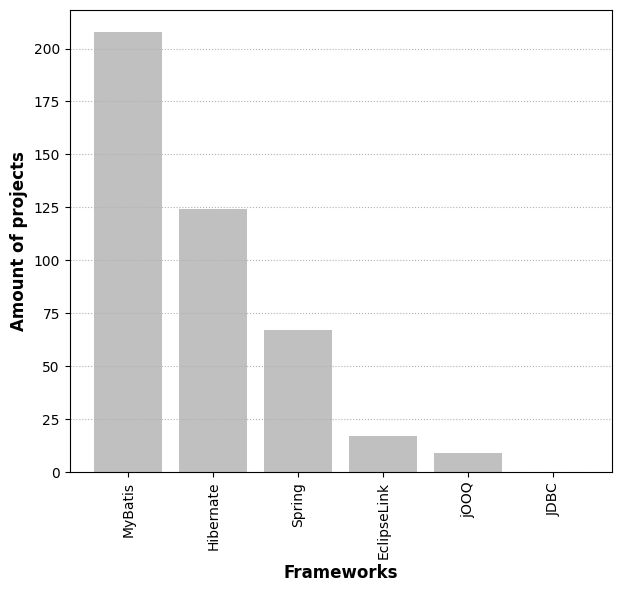

In [6]:
# Renomeia a coluna "mybatis" para "MyBatis"
data_with_index = data_with_index.rename(columns={"mybatis": "MyBatis"})

# Define o tamanho da figura
plt.figure(figsize=(7,6))

# Remove a função addlabels, que adicionava as contagens no topo das barras
# def addlabels(x, y):
#     for i in range(len(x)):
#         plt.text(i, y[i], y[i], ha = 'center')

# Prepara os dados
df = data_with_index.iloc[:, 1:].sum().sort_values(ascending=False)

# Cria o gráfico de barras
plt.bar(df.index, df.values, color='silver')

# Rotaciona os rótulos do eixo X
plt.xticks(rotation=90)

# Adiciona os rótulos dos eixos
plt.xlabel("Frameworks", fontweight="bold", fontsize=12)
plt.ylabel("Amount of projects", fontweight="bold", fontsize=12)

# Adiciona grid pontilhado no eixo Y
plt.grid(axis='y', linestyle=':', linewidth=0.8)

# Salva o gráfico em formato PDF
plt.savefig(IMAGES_DIR + "/fig5.pdf", format="pdf", bbox_inches="tight")
plt.show()


In [15]:
from util import USAGE_FAN_IN_FILE
df = pd.read_excel(USAGE_FAN_IN_FILE, engine = 'openpyxl')
df.head()

,Projects,N DB-Code Test,N DB-Code Java,N DB-Code XML,N DB-Code Not Java/XML,N Dependencies Test,N Dependencies Code,N Dependencies XML,N Dependencies Not Java/XML,N Total Project,N Total DB,DB-Code Test,DB-Code Java,DB-Code XML,Dependencies Test,Dependencies Code,Dependencies XML,Total DB
0,tinkerpop,3.0,NaN,1.0,8.0,3.0,NaN,NaN,NaN,3744.0,15.0,0.080128,NaN,0.026709,0.080128,NaN,NaN,0.400641
1,flink,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,22461.0,NaN,NaN,NaN,0.004452,NaN,NaN,NaN,NaN
2,hadoop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,beam,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1292.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ambari,95.0,209.0,13.0,54.0,NaN,NaN,NaN,NaN,10718.0,538.0,0.886359,1.949991,0.121291,NaN,NaN,NaN,5.019593


In [17]:
data_with_index = df.iloc[: , :].sort_values(by='Total DB', ascending=False)
data_with_index.head()

,Projects,N DB-Code Test,N DB-Code Java,N DB-Code XML,N DB-Code Not Java/XML,N Dependencies Test,N Dependencies Code,N Dependencies XML,N Dependencies Not Java/XML,N Total Project,N Total DB,DB-Code Test,DB-Code Java,DB-Code XML,Dependencies Test,Dependencies Code,Dependencies XML,Total DB
64,ebean,847.0,23.0,2.0,6.0,1656.0,437.0,1.0,1.0,4286.0,2988.0,19.762016,0.536631,0.046664,38.637424,10.195987,0.023332,69.715352
28,BroadleafCommerce,6.0,552.0,146.0,22.0,67.0,653.0,7.0,7.0,3886.0,1126.0,0.154400,14.204838,3.757077,1.724138,16.803911,0.180134,28.975811
9,commafeed,NaN,28.0,8.0,NaN,6.0,64.0,NaN,NaN,373.0,94.0,NaN,7.506702,2.144772,1.608579,17.158177,NaN,25.201072
52,cuba,NaN,387.0,50.0,20.0,NaN,885.0,2.0,2.0,5702.0,1339.0,NaN,6.787092,0.876885,NaN,15.520870,0.035075,23.482988
63,dropwizard,40.0,25.0,7.0,NaN,101.0,44.0,NaN,NaN,1272.0,165.0,3.144654,1.965409,0.550314,7.940252,3.459119,NaN,12.971698


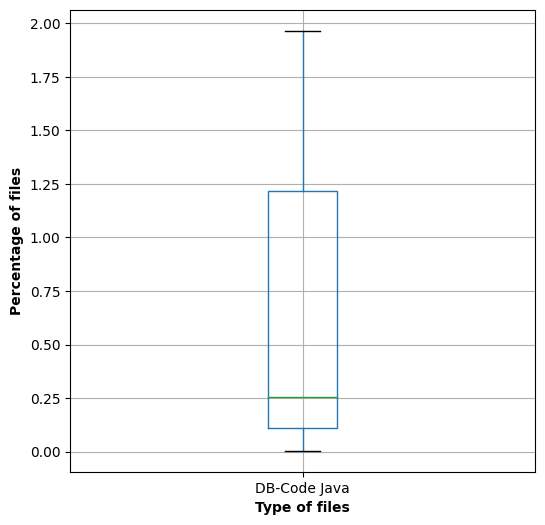

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize =(6, 6))

stud_bplt = df.boxplot(column=['DB-Code Java'], showfliers=False)

stud_bplt.plot()
plt.xlabel("Type of files", fontweight = "bold")
plt.ylabel("Percentage of files" , fontweight = "bold")
plt.show()

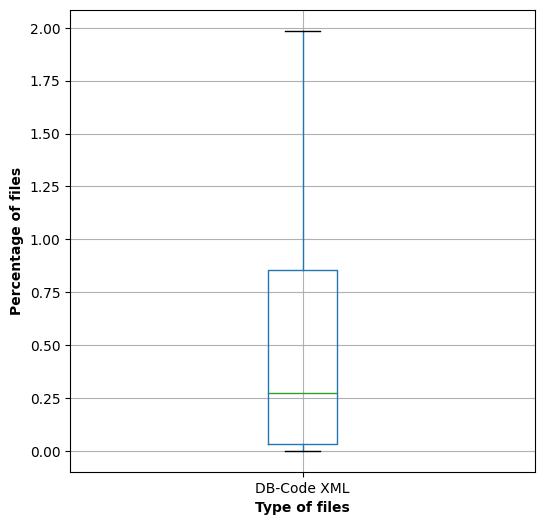

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize =(6, 6))
stud_bplt = df.boxplot(column=['DB-Code XML'], showfliers=False)

stud_bplt.plot()
plt.xlabel("Type of files", fontweight = "bold")
plt.ylabel("Percentage of files", fontweight = "bold")
plt.show()

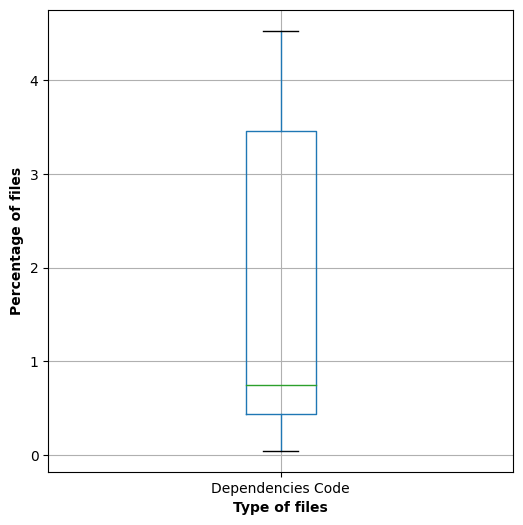

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize =(6, 6))
stud_bplt = df.boxplot(column=['Dependencies Code'], showfliers=False)

stud_bplt.plot()
plt.xlabel("Type of files", fontweight = "bold")
plt.ylabel("Percentage of files", fontweight = "bold")
plt.show()

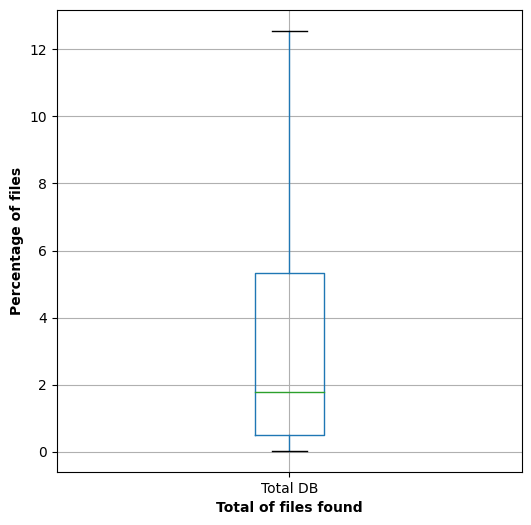

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize =(6, 6))
stud_bplt = df.boxplot(column=['Total DB'], showfliers=False)

stud_bplt.plot()
plt.xlabel("Total of files found", fontweight = "bold")
plt.ylabel("Percentage of files", fontweight = "bold")
plt.show()

<Figure size 1700x600 with 0 Axes>

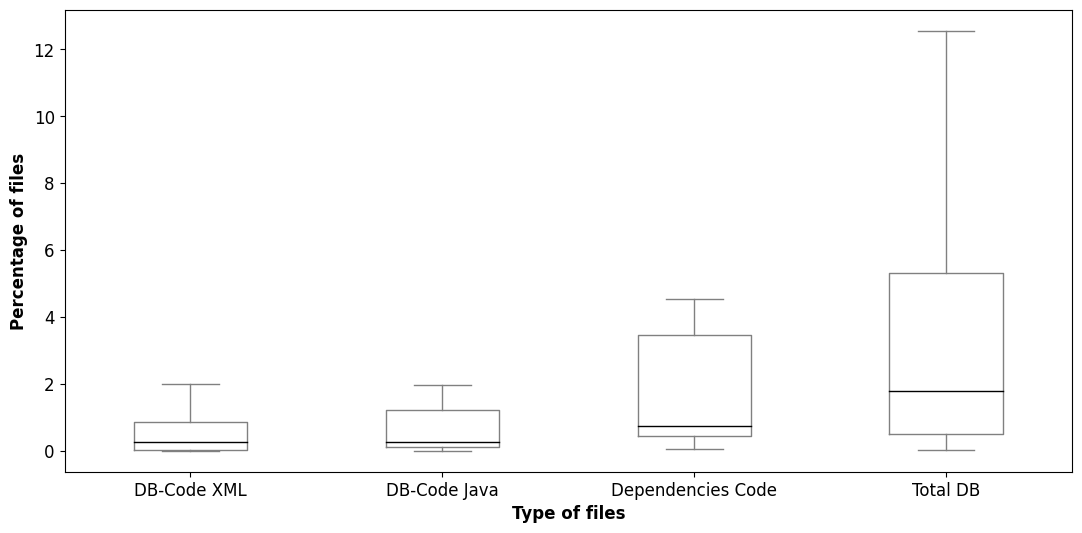

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize =(17, 6))

filerproperties = dict(markerfacecolor = 'gray', markeredgecolor = 'gray')
colors = dict(boxes = 'gray', medians = 'black', caps = 'gray', whiskers = 'gray')

plt.figure(figsize =(13, 6))

stud_bplt = df.boxplot(column=['DB-Code XML', 'DB-Code Java', 'Dependencies Code', 'Total DB'], showfliers=False,
                       showmeans= False, fontsize=12, sym=".", color = colors, grid=False);

stud_bplt.plot()
plt.ylabel("Percentage of files", fontweight = "bold", fontsize=12)
plt.xlabel("Type of files", fontweight = "bold", fontsize=12)
plt.savefig(IMAGES_DIR+"/fig7.pdf", format="pdf", bbox_inches="tight")
plt.show()


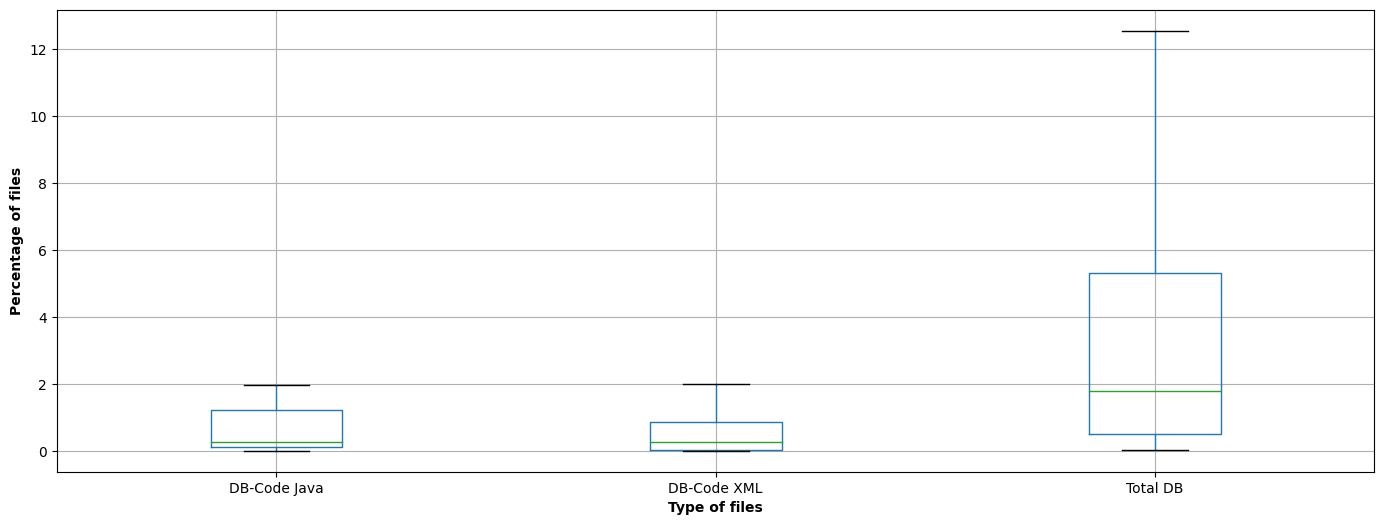

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import os

CHARACTERIZATION_FILE_PATH = RESOURCE_DIR + os.sep + type_characterization[6]
df = pd.read_excel(CHARACTERIZATION_FILE_PATH, engine = 'openpyxl')

import matplotlib.pyplot as plt
plt.figure(figsize =(17, 6))
stud_bplt = df.boxplot(column=['DB-Code Java', 'DB-Code XML',  'Total DB'], showfliers=False) #'Dependencies',

stud_bplt.plot()
plt.ylabel("Percentage of files", fontweight = "bold")
plt.xlabel("Type of files", fontweight = "bold")
plt.show()

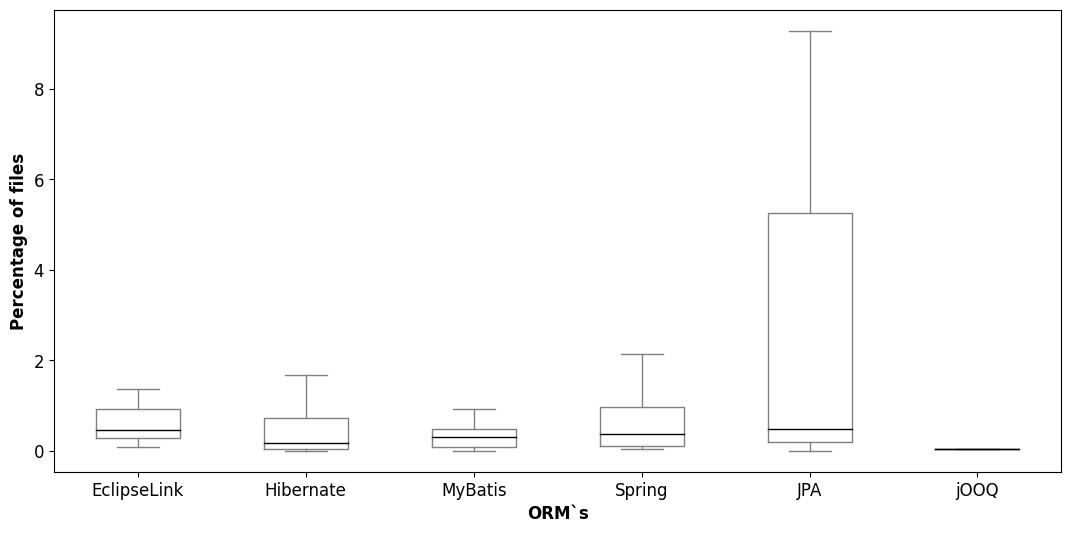

In [23]:
import matplotlib.pyplot as plt

CHARACTERIZATION_FILE_PATH = RESOURCE_DIR + os.sep + type_characterization[4]
df = pd.read_excel(CHARACTERIZATION_FILE_PATH, engine = 'openpyxl')

df = df.rename(columns={"mybatis": "MyBatis"})

#figWidth = 4; figHeigth = 4.1;
filerproperties = dict(markerfacecolor = 'gray', markeredgecolor = 'gray')
colors = dict(boxes = 'gray', medians = 'black', caps = 'gray', whiskers = 'gray')

plt.figure(figsize =(13, 6))
stud_bplt = df.boxplot(column=['EclipseLink', 'Hibernate', 'MyBatis','Spring', 'JPA',  'jOOQ' ], showfliers=False,
                       showmeans= False, fontsize=12, sym=".", color = colors, grid=False);
stud_bplt.plot()
plt.xlabel("ORM`s", fontweight = "bold",  fontsize=12)
plt.ylabel("Percentage of files", fontweight = "bold", fontsize=12)

plt.savefig(IMAGES_DIR+"/fig6.pdf", format="pdf", bbox_inches="tight")
plt.show()



In [64]:
CHARACTERIZATION_FILE_PATH = RESOURCE_DIR + os.sep + type_characterization[3]
df = pd.read_excel(CHARACTERIZATION_FILE_PATH, engine = 'openpyxl')
df = df.rename(columns = {'(IgnoreCase, SQL)':'SQL'})
df.head()

,Projects,Domains,Builder,SQL
0,Activiti,automation,1,1
1,airbyte,infrastructure management,1,1
2,airsonic,media,1,1
3,spring-cloud-alibaba,infrastructure management,1,1
4,nacos,infrastructure management,1,1


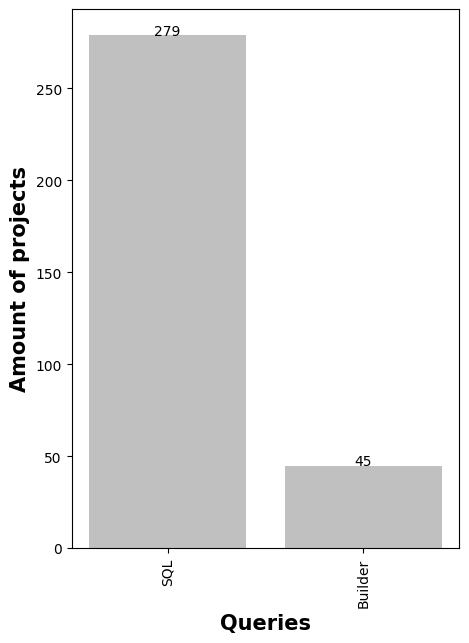

In [65]:
plt.figure(figsize=(5,7))

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

df = df.iloc[: , 2:].sum().sort_values(ascending=False)
plt.bar(df.index, df.values, color='silver')
addlabels(df.index, df.values)
plt.xticks(rotation=90)

plt.xlabel("Queries", fontweight = "bold", fontsize = 15)
plt.ylabel("Amount of projects", fontweight = "bold", fontsize = 15)
plt.show()

<AxesSubplot:xlabel='Type of file', ylabel='Total'>

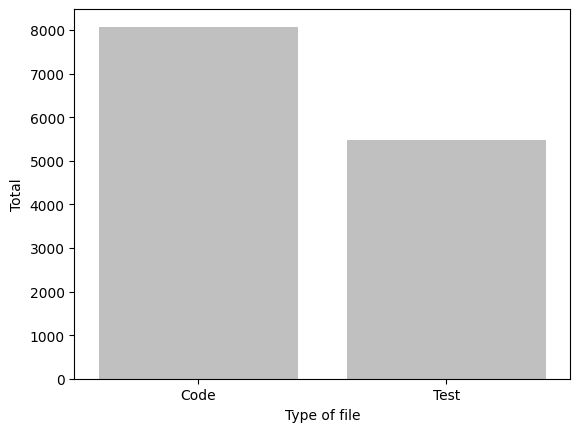

In [66]:
import seaborn as sns

number_of_files = pd.read_excel('../resources/number_of_files.xlsx')

total_code_files = number_of_files['Code'].sum()
total_test_files = number_of_files['Test'].sum()

dados = {
    'Type of file': ['Code', 'Test'],
    'Total': [total_code_files, total_test_files]
}

dados = pd.DataFrame(dados)

sns.barplot(x = 'Type of file', y = 'Total', data = dados, color = 'silver')

<Figure size 1600x1600 with 0 Axes>

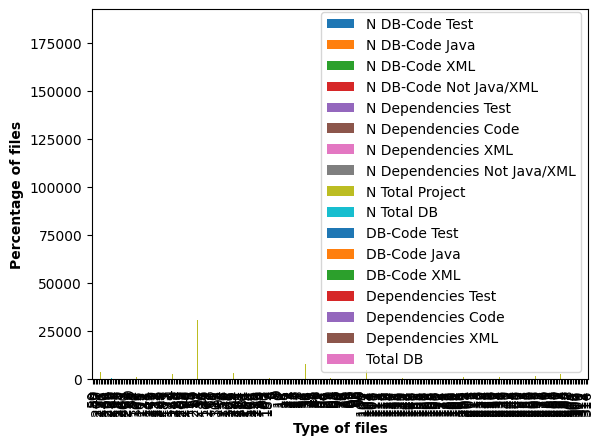

In [67]:
import matplotlib.pyplot as plt

plt.figure(figsize =(16, 16))

stud_bplt = data_with_index.plot.bar(column=['N Total DB', 'N Dependencies Code'])

plt.xlabel("Type of files", fontweight = "bold")
plt.ylabel("Percentage of files" , fontweight = "bold")
plt.show()


In [68]:
from apyori import apriori

rules = apriori(data_with_index, min_support = 0.03, min_confidence = 0.2, min_lift = 3, min_length = 2)

results = list(rules)
results = pd.DataFrame(results)
results.head(5)

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

CHARACTERIZATION_FILE_PATH = RESOURCE_DIR + os.sep + type_characterization[1]
df = pd.read_excel(CHARACTERIZATION_FILE_PATH, engine = 'openpyxl')
df = df.iloc[: , 2:]

frq_items = apriori(df, min_support = 0.01, use_colnames = True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
rules = rules.sort_values('lift', ascending =False)
rules = rules[rules['consequents'].apply(lambda x: len(x)) == 1]
rules[rules['antecedents'] == {'JPA'}]


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
19,(JPA),(EclipseLink),0.211356,0.044164,0.034700,0.164179,3.717484,0.025366,1.143589
11,(JPA),(Spring),0.211356,0.141956,0.066246,0.313433,2.207960,0.036243,1.249760
17,(JPA),(Hibernate),0.211356,0.296530,0.123028,0.582090,1.963004,0.060355,1.683303
3,(JPA),(mybatis),0.211356,0.488959,0.160883,0.761194,1.556765,0.057539,2.139984


In [ ]:
ARACTERIZATION_FILE_PATH = RESOURCE_DIR + os.sep + type_characterization[1]
df = pd.read_excel(CHARACTERIZATION_FILE_PATH, engine = 'openpyxl')
df = df.iloc[: , 2:]

frq_items = apriori(df, min_support = 0.01, use_colnames = True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
rules = rules.sort_values('lift', ascending =False)
rules = rules[rules['consequents'].apply(lambda x: len(x)) == 1]
rules[rules['antecedents'] == {'JPA'}]


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
19,(JPA),(EclipseLink),0.211356,0.044164,0.034700,0.164179,3.717484,0.025366,1.143589
11,(JPA),(Spring),0.211356,0.141956,0.066246,0.313433,2.207960,0.036243,1.249760
17,(JPA),(Hibernate),0.211356,0.296530,0.123028,0.582090,1.963004,0.060355,1.683303
3,(JPA),(mybatis),0.211356,0.488959,0.160883,0.761194,1.556765,0.057539,2.139984


In [ ]:
USAGE_FAN_IN_FILE_PATH = RESOURCE_DIR + os.sep + "usage_fan_in_file.xlsx"
df_usage_fan_in = pd.read_excel(USAGE_FAN_IN_FILE_PATH, engine = 'openpyxl')
#df_usage_fan_in.rename(columns={"A": "a", "B": "c"})

CHARACTERIZATION_FILE_PATH = RESOURCE_DIR + os.sep + type_characterization[2]
implementation = pd.read_excel(CHARACTERIZATION_FILE_PATH, engine = 'openpyxl')

implementation_usage = pd.merge(implementation, df_usage_fan_in, how = 'inner', on = 'Projects')
#implementation_usage = implementation_usage.drop(columns=['DB-Code(Java)', 'DB-Code(XML)', 'Dependencies', 'Total-DB', 'Total-Project' ])
implementation_usage.head()

,Projects,Domains,mybatis,jOOQ,Spring,JPA,JDBC,Hibernate,EclipseLink,N DB-Code Test,...,N Dependencies Not Java/XML,N Total Project,N Total DB,DB-Code Test,DB-Code Java,DB-Code XML,Dependencies Test,Dependencies Code,Dependencies XML,Total DB
0,Activiti,automation,mybatis,NaN,Spring,JPA,NaN,Hibernate,NaN,33.0,...,NaN,4872,264.0,0.677340,0.903120,1.990969,1.067323,4.310345,NaN,5.418719
1,airbyte,infrastructure management,NaN,jOOQ,NaN,NaN,NaN,NaN,NaN,34.0,...,NaN,6172,202.0,0.550875,0.194426,NaN,1.425794,0.729099,NaN,3.272845
2,airsonic,media,mybatis,NaN,NaN,NaN,NaN,NaN,EclipseLink,NaN,...,NaN,1535,6.0,NaN,0.065147,2.019544,0.065147,0.260586,NaN,0.390879
3,spring-cloud-alibaba,infrastructure management,NaN,NaN,Spring,NaN,NaN,Hibernate,NaN,NaN,...,NaN,645,NaN,NaN,NaN,0.310078,NaN,NaN,NaN,NaN
4,nacos,infrastructure management,mybatis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1939,26.0,NaN,0.464157,NaN,0.154719,0.567303,NaN,1.340897


In [ ]:
implementation_usage = implementation_usage.drop(columns='Projects')

new_frameworks_list = []
new_frameworks_list_string = []

frameworks_list = implementation_usage.iloc[: , 2:7].values.tolist()  

for i in frameworks_list:
    new_frameworks_list_not_null = [x for x in i if pd.isnull(x) == False]
    new_frameworks_list_string = '/'.join([str(item) for item in new_frameworks_list_not_null])
    new_frameworks_list.append(new_frameworks_list_string)

df_implementation_usage = implementation_usage.iloc[: , 8:]
df_implementation_usage = df_implementation_usage.assign(ListFrameworks = new_frameworks_list)

#print(df_implementation_usage)

df_group_implementation_usage = df_implementation_usage.groupby('ListFrameworks')['Total DB'].apply(list).reset_index(name='NumberDBFiles')

df_group_implementation_usage.head()




,ListFrameworks,NumberDBFiles
0,,"[0.3908794788273616, 1.340897369778236, nan, n..."
1,Hibernate,"[nan, 0.482218203737191, 0.627177700348432, na..."
2,JPA,"[nan, nan, 4.826254826254826, 0.85959885386819..."
3,JPA/Hibernate,"[0.6314127861089187, 0.8616529951058111, nan, ..."
4,Spring,"[nan, nan, nan, nan, 45.91836734693878, nan, n..."


In [ ]:
CHARACTERIZATION_FILE_PATH = RESOURCE_DIR + os.sep + type_characterization[3]
df = pd.read_excel(CHARACTERIZATION_FILE_PATH, engine = 'openpyxl')
df = df.rename(columns = {'(IgnoreCase, SQL)':'SQL'})
df['SumPerProject'] = df.sum(axis=1)

df_count_2 = df[df.SumPerProject == 2].count()
print(df_count_2)
df_count_sql = df[df.SQL ==1].count()
print(df_count_sql)
df_count_builder = df[df.Builder == 1].count()
print(df_count_builder)
df_count_0 = df[df.SumPerProject == 0].count()
print(df_count_0)


Projects         44
Domains          44
Builder          44
SQL              44
SumPerProject    44
dtype: int64
Projects         279
Domains          279
Builder          279
SQL              279
SumPerProject    279
dtype: int64
Projects         45
Domains          45
Builder          45
SQL              45
SumPerProject    45
dtype: int64
Projects         37
Domains          37
Builder          37
SQL              37
SumPerProject    37
dtype: int64


<ipython-input-12-12577625220d>:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df['SumPerProject'] = df.sum(axis=1)


In [ ]:
from util import RESOURCE_DIR
type_characterization = ['database.xlsx', 'implementation.xlsx', 'implementation_names.xlsx', 'query.xlsx', 'count_implementation_rate.xlsx', 'count_sql.xlsx', 'count_implementation.xlsx']
CHARACTERIZATION_FILE_PATH = RESOURCE_DIR + os.sep + type_characterization[4] #4
df = pd.read_excel(CHARACTERIZATION_FILE_PATH, engine = 'openpyxl')
len(df)
df = df.dropna(axis = 0, how = 'all', subset=['mybatis', 'jOOQ', 'Spring', 'JPA', 'JDBC', 'Hibernate', 'EclipseLink'])
size_df = len(df)
df_framework = df.sum(axis=0, numeric_only=True)
media = df_framework.sum() / size_df

df_frameworks = df.median(numeric_only=True)
df_frameworks.median()
print(df_frameworks.median())

df_frameworks = df.mean(numeric_only=True)
print(df_frameworks.mean())

0.23666945840312675
0.994340271084661


In [ ]:
from util import RESOURCE_DIR
type_characterization = ['database.xlsx', 'implementation.xlsx', 'implementation_names.xlsx', 'query.xlsx', 'count_implementation_rate.xlsx', 'count_sql.xlsx', 'count_implementation.xlsx']
CHARACTERIZATION_FILE_PATH = RESOURCE_DIR + os.sep + type_characterization[5]
df = pd.read_excel(CHARACTERIZATION_FILE_PATH, engine = 'openpyxl')
len(df)
df_Builder_sql = df.median(axis = 0, numeric_only=True)
df_Builder_sql

Builder              18.0
(IgnoreCase, SQL)    10.0
dtype: float64